In [ ]:
import zipfile

# Define the path to the uploaded dataset file
zip_file_path = '/content/archive (1).zip'  # Update this path if necessary

# Specify the extraction directory
extracted_dir_path = '/content/dataset'

# Extract the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)


In [ ]:
#prepareing image data for training a machine learning model by loading, preprocessing, and splitting the dataset into training, validation, and testing sets.

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

# Define the paths to the uploaded dataset in Google Colab
extracted_dir_path = '/content/dataset'

# Preprocess the data
def load_images(folder_path):
    images = []
    labels = []
    for folder_name in os.listdir(folder_path):
        folder = os.path.join(folder_path, folder_name)
        if os.path.isdir(folder):
            if folder_name.startswith('no'):
                label = 'no_tumor'  # Label 'no_tumor' for images with no tumor
            else:
                label = folder_name.split('_')[0]  # Extract tumor type from folder name
            print(f"Loading images from folder: {folder}")
            for filename in os.listdir(folder):
                img_path = os.path.join(folder, filename)
                try:
                    img = cv2.imread(img_path)
                    if img is not None:
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB
                        img = cv2.resize(img, (224, 224))  # Resize image to a standard size
                        images.append(img)
                        labels.append(label)
                    else:
                        print(f"Failed to load image: {img_path}")
                except Exception as e:
                    print(f"Error loading image: {img_path} - {str(e)}")
        else:
            print(f"{folder} is not a directory.")
    return np.array(images), np.array(labels)

# Specify the paths to the training and testing dataset directories
training_path = os.path.join(extracted_dir_path, 'Training')
testing_path = os.path.join(extracted_dir_path, 'Testing')

# Load images from the training and testing dataset directories
training_images, training_labels = load_images(training_path)
testing_images, testing_labels = load_images(testing_path)

# Split the dataset into training, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(training_images, training_labels, test_size=0.2, random_state=42)



Loading images from folder: /content/dataset/Training/no_tumor
Loading images from folder: /content/dataset/Training/glioma_tumor
Loading images from folder: /content/dataset/Training/pituitary_tumor
Loading images from folder: /content/dataset/Training/meningioma_tumor
Loading images from folder: /content/dataset/Testing/no_tumor
Loading images from folder: /content/dataset/Testing/glioma_tumor
Loading images from folder: /content/dataset/Testing/pituitary_tumor
Loading images from folder: /content/dataset/Testing/meningioma_tumor


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Explore the Dataset
print("Shape of training images:", X_train.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of validation images:", X_val.shape)
print("Shape of validation labels:", y_val.shape)

Shape of training images: (2296, 224, 224, 3)
Shape of training labels: (2296,)
Shape of validation images: (574, 224, 224, 3)
Shape of validation labels: (574,)


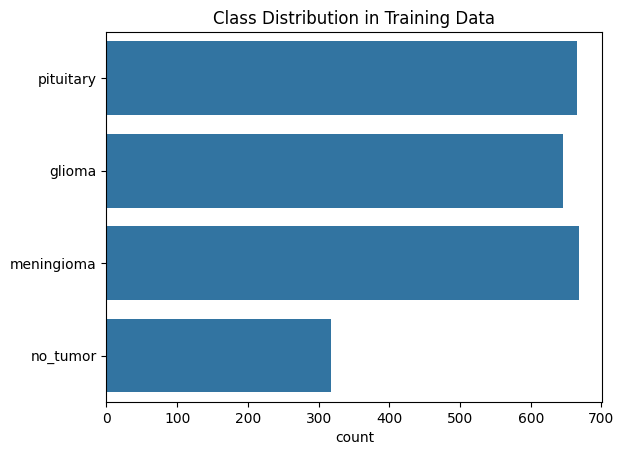

In [ ]:
# 2. Visualize Class Distribution
sns.countplot(y_train)
plt.title('Class Distribution in Training Data')
plt.show()

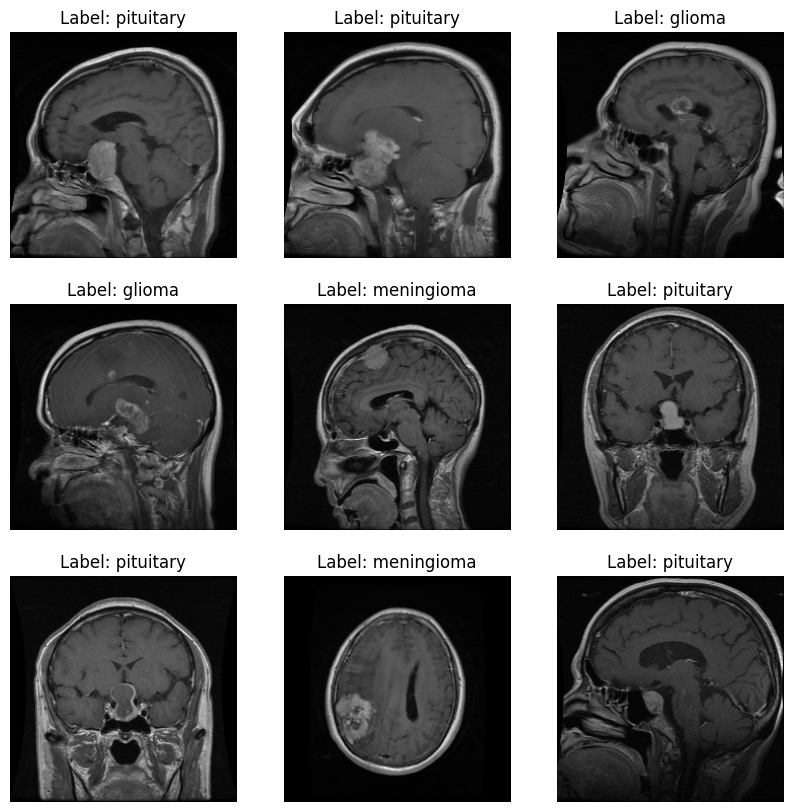

In [ ]:
# 3. Visualize Sample Images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i])
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

In [ ]:
# 4. Explore Image Properties
print("Image Properties:")
print("Image Shape:", X_train[0].shape)
print("Pixel Intensity Range:", np.min(X_train), np.max(X_train))

#Image Shape:image has a resolution of 224 pixels in height and 224 pixels in width. The '3' at the end indicates that the image is in color (RGB), with three channels corresponding to red, green, and blue.
#Pixel: pixel intensity values in the image range from 0 to 255. This is standard for images represented in an 8-bit format, where each channel (red, green, blue) can have intensity values ranging from 0 (black) to 255 (fully saturated color).

Image Properties:
Image Shape: (224, 224, 3)
Pixel Intensity Range: 0 255


In [ ]:
# 5. Perform Data Preprocessing - Normalize pixel values
X_train_normalized = X_train.astype('float32') / 255.0
X_val_normalized = X_val.astype('float32') / 255.0


In [ ]:
# 6. Explore Relationships - Analyze correlations
# Calculate mean pixel intensity for each class
mean_intensity_class0 = np.mean(X_train_normalized[y_train == 0])
mean_intensity_class1 = np.mean(X_train_normalized[y_train == 1])

#These mean pixel intensity values indicate that, on average, pixels in images without tumors (Class 0) have a higher intensity (0.23229928) compared to pixels in images with tumors (Class 1), which have a lower intensity (0.17034984).
#This suggests that there may be differences in pixel intensity distributions between the two classes, which could potentially be used as features for distinguishing between tumor and non-tumor images. Further analysis or feature engineering based on pixel intensity values could be explored to improve the classification model's performance.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
#Creating Baseline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform string labels to integer labels
training_labels_encoded = label_encoder.fit_transform(training_labels)

# Calculate the distribution of classes in your dataset
class_distribution = np.bincount(training_labels_encoded) / len(training_labels_encoded)

# Generate random predictions for each sample based on the class distribution
random_predictions = np.random.choice(np.unique(training_labels_encoded), size=len(training_labels_encoded), p=class_distribution)

# Evaluate the accuracy of the random predictions
random_accuracy = accuracy_score(training_labels_encoded, random_predictions)
print("Random Baseline Accuracy:", random_accuracy)


Random Baseline Accuracy: 0.2763066202090592


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

In [ ]:
#providing a pipeline for loading, preprocessing, visualizing, and splitting image data for brain tumor classification tasks.

<Figure size 640x480 with 0 Axes>

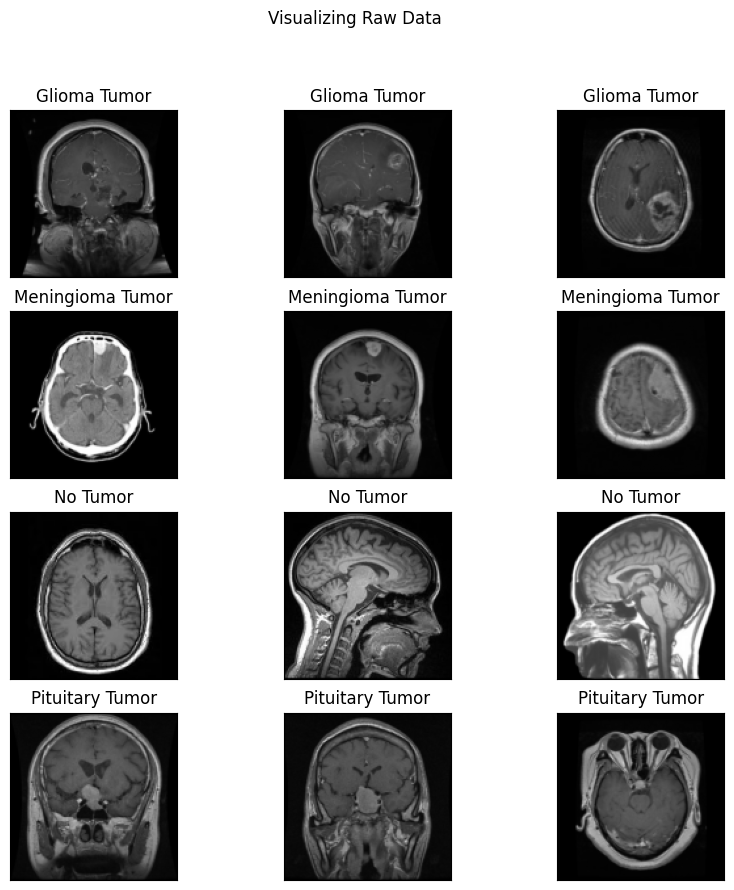

(array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         7.80431283e-12, 7.80431283e-12, 7.80431283e-12],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [1.56086257e-11, 1.56086257e-11, 1.56086257e-11, ...,
         4.97221494e-04, 4.97221494e-04, 4.97221494e-04],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.75384760e-02, 4.75384760e-02, 4.75384760e-02, ...,
         4.70588299e-02, 4.70588299e-02, 4.70588299e-02]]),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,

In [ ]:
from skimage.io import imread  # Import imread function from scikit-image
import os
import numpy as np
from skimage import io, transform
import matplotlib.pyplot as plt  # Import matplotlib for visualization
from sklearn.model_selection import train_test_split

# Define the function to load and preprocess images
def get_data(test=False, visualize=False):
    np.random.seed(0)

    path = os.getcwd() + "/dataset/"  # Dataset directory
    if test:
        path += 'Testing/'  # Testing directory
    else:
        path += 'Training/'  # Training directory

    glioma_path = os.path.join(path, "glioma_tumor")
    meningioma_path = os.path.join(path, "meningioma_tumor")
    no_tumor_path = os.path.join(path, "no_tumor")
    pituitary_tumor_path = os.path.join(path, "pituitary_tumor")

    gliomatumorfiles = os.listdir(glioma_path)
    meningiomatumorfiles = os.listdir(meningioma_path)
    notumorfiles = os.listdir(no_tumor_path)
    pituitarytumorfiles = os.listdir(pituitary_tumor_path)

    # Resize all images to a common shape
    glioma_images = [transform.resize(io.imread(os.path.join(glioma_path, file)), (128, 128)) for file in gliomatumorfiles]
    meningioma_images = [transform.resize(io.imread(os.path.join(meningioma_path, file)), (128, 128)) for file in meningiomatumorfiles]
    no_images = [transform.resize(io.imread(os.path.join(no_tumor_path, file)), (128, 128)) for file in notumorfiles]
    pituitary_images = [transform.resize(io.imread(os.path.join(pituitary_tumor_path, file)), (128, 128)) for file in pituitarytumorfiles]

    if visualize:
        # Visualize raw data
        scans = [glioma_images, meningioma_images, no_images, pituitary_images]
        scan_labels = ['Glioma Tumor', 'Meningioma Tumor', 'No Tumor', 'Pituitary Tumor']

        plt.figure()
        fig, ax = plt.subplots(4, 3, figsize=(10, 10))
        for i in range(4):
            for j in range(3):
                ax[i, j].imshow(scans[i][j], cmap='Greys_r')
                ax[i, j].set_title(scan_labels[i])
                ax[i, j].set_xticks([])
                ax[i, j].set_yticks([])
        plt.suptitle('Visualizing Raw Data')
        plt.show()

    if not test:
        # Flatten the images
        glioma_images_flat = [image.flatten() for image in glioma_images]
        meningioma_images_flat = [image.flatten() for image in meningioma_images]
        no_images_flat = [image.flatten() for image in no_images]
        pituitary_images_flat = [image.flatten() for image in pituitary_images]

        # Labeling tumor = 1, non-tumor = 0
        tumor_labels = np.array([1] * len(glioma_images_flat + meningioma_images_flat + pituitary_images_flat))
        nontumor_labels = np.array([0] * len(no_images_flat))

        # Combine images and labels
        X = np.array(glioma_images_flat + meningioma_images_flat + no_images_flat + pituitary_images_flat)
        Y = np.concatenate((tumor_labels, nontumor_labels))

        # Splitting into train/validation data
        X_train, X_dev, Y_train, Y_dev = train_test_split(X, Y, test_size=0.25, random_state=42)

        return X_train, X_dev, Y_train, Y_dev

# Call the get_data function with visualize=True
get_data(visualize=True)




In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Step 1: Choose a Pre-trained Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
#CNN Arch - TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform string labels to integer labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Convert integer labels to one-hot encoded format
num_classes = len(label_encoder.classes_)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_val_one_hot = to_categorical(y_val_encoded, num_classes=num_classes)

# Define the CNN model architecture for multiclass classification
def create_multiclass_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape),
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Usage with modified model and one-hot encoded labels
cnn_model_multiclass = create_multiclass_cnn_model(input_shape=(224, 224, 3), num_classes=num_classes)
cnn_model_multiclass.fit(X_train, y_train_one_hot, epochs=15, batch_size=64, validation_data=(X_val, y_val_one_hot))


Epoch 1/15
36/36 [==============================] - 10s 106ms/step - loss: 1.2977 - accuracy: 0.4983 - val_loss: 0.7364 - val_accuracy: 0.7300
Epoch 2/15
36/36 [==============================] - 2s 53ms/step - loss: 0.6665 - accuracy: 0.7226 - val_loss: 0.5980 - val_accuracy: 0.7927
Epoch 3/15
36/36 [==============================] - 2s 50ms/step - loss: 0.4157 - accuracy: 0.8341 - val_loss: 0.4607 - val_accuracy: 0.8310
Epoch 4/15
36/36 [==============================] - 2s 47ms/step - loss: 0.2640 - accuracy: 0.9024 - val_loss: 0.3312 - val_accuracy: 0.8798
Epoch 5/15
36/36 [==============================] - 2s 48ms/step - loss: 0.1512 - accuracy: 0.9464 - val_loss: 0.4188 - val_accuracy: 0.8554
Epoch 6/15
36/36 [==============================] - 2s 47ms/step - loss: 0.1235 - accuracy: 0.9564 - val_loss: 0.3596 - val_accuracy: 0.8780
Epoch 7/15
36/36 [==============================] - 2s 48ms/step - loss: 0.0490 - accuracy: 0.9874 - val_loss: 0.3945 - val_accuracy: 0.8850
Epoch 8/15


In [ ]:
#Transfer Learning
from tensorflow.keras.applications import VGG16

# Load pre-trained VGG16 model (excluding the top layer)
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the pre-trained layers to prevent them from being updated during training
for layer in vgg_base.layers:
    layer.trainable = False

# Add custom classification layers on top of the pre-trained base
transfer_model = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Multiclass classification with softmax activation
])


# Compile the model
transfer_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


In [ ]:
#Data Augmentation
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.transform import resize

# Load pre-trained VGG16 model (excluding the top layer)
# Change the input shape of the VGG16 model to match X_train
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the pre-trained layers to prevent them from being updated during training
for layer in vgg_base.layers:
    layer.trainable = False

# Add custom classification layers on top of the pre-trained base
transfer_model = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Multiclass classification with softmax activation
])

# Compile the model
transfer_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Check the shape of X_train before reshaping
print("Shape of X_train:", X_train.shape)

# Reshape and preprocess X_train to have the desired shape and range [0, 1]
image_height = 128
image_width = 128
num_channels = 3

# Resize and preprocess images in X_train to (128, 128)
X_train_resized = np.array([resize(image, (image_height, image_width)) / 255. for image in X_train])

# Ensure compatibility of labels with the model
# One-hot encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
num_classes = len(label_encoder.classes_)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

# Generate augmented data for training
# Define batch size
batch_size = 32  # You can adjust this as needed

# Generate augmented data for training
train_generator = datagen.flow(X_train_resized, y_train_one_hot, batch_size=batch_size)

# Split the data into training and validation sets
X_train_aug, X_val_aug, y_train_aug, y_val_aug = train_test_split(X_train_resized, y_train_one_hot, test_size=0.2, random_state=42)

# Train the transfer learning model with augmented data
history = transfer_model.fit(train_generator,
                             steps_per_epoch=len(X_train_aug) // batch_size,
                             epochs=10,
                             validation_data=(X_val_aug, y_val_aug))


Shape of X_train: (2296, 224, 224, 3)
Epoch 1/10
57/57 [==============================] - 17s 230ms/step - loss: 1.4187 - accuracy: 0.2930 - val_loss: 1.3685 - val_accuracy: 0.3000
Epoch 2/10
57/57 [==============================] - 9s 155ms/step - loss: 1.3547 - accuracy: 0.2996 - val_loss: 1.3541 - val_accuracy: 0.2500
Epoch 3/10
57/57 [==============================] - 8s 147ms/step - loss: 1.3500 - accuracy: 0.2803 - val_loss: 1.3533 - val_accuracy: 0.2500
Epoch 4/10
57/57 [==============================] - 8s 133ms/step - loss: 1.3473 - accuracy: 0.2919 - val_loss: 1.3522 - val_accuracy: 0.3000
Epoch 5/10
57/57 [==============================] - 8s 134ms/step - loss: 1.3517 - accuracy: 0.2825 - val_loss: 1.3530 - val_accuracy: 0.3000
Epoch 6/10
57/57 [==============================] - 9s 158ms/step - loss: 1.3522 - accuracy: 0.2836 - val_loss: 1.3599 - val_accuracy: 0.2500
Epoch 7/10
57/57 [==============================] - 8s 148ms/step - loss: 1.3500 - accuracy: 0.2764 - val_los

In [ ]:
#PCA with Naive-Bayes, Random Forest, and K-Nearest Neighbors (KNN):
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Perform PCA for dimensionality reduction
pca = PCA(n_components=100)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_val_pca = pca.transform(X_val.reshape(X_val.shape[0], -1))

# Train classifiers
nb_classifier = GaussianNB()
rf_classifier = RandomForestClassifier()
knn_classifier = KNeighborsClassifier()

nb_classifier.fit(X_train_pca, y_train)
rf_classifier.fit(X_train_pca, y_train)
knn_classifier.fit(X_train_pca, y_train)

# Evaluate classifiers
nb_accuracy = nb_classifier.score(X_val_pca, y_val)
rf_accuracy = rf_classifier.score(X_val_pca, y_val)
knn_accuracy = knn_classifier.score(X_val_pca, y_val)

print("Naive Bayes Accuracy:", nb_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)


Naive Bayes Accuracy: 0.6236933797909407
Random Forest Accuracy: 0.8362369337979094
K-Nearest Neighbors Accuracy: 0.818815331010453


In [ ]:
# 1. Generate augmented data for training the transfer learning model
output_classes = num_classes  # Define the number of output classes
transfer_model = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(output_classes, activation='softmax')  # Adjust output_classes
])

# Compile the model
transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from skimage import transform

# Resize input images to match the expected input shape of the transfer learning model
X_train_resized = np.array([transform.resize(image, (128, 128)) for image in X_train])
X_val_resized = np.array([transform.resize(image, (128, 128)) for image in X_val])

# Train the transfer learning model with augmented data
history = transfer_model.fit(train_generator,
                              steps_per_epoch=len(X_train_resized) // batch_size,
                              epochs=10,
                              validation_data=(X_val_resized, y_val_one_hot))

#2. Evaluate the transfer learning model on the validation data
loss, accuracy = transfer_model.evaluate(X_val_resized, y_val_one_hot)
print("Transfer Learning Model Accuracy:", accuracy)


# 3. Evaluate PCA-based classifiers on the validation data
nb_accuracy = nb_classifier.score(X_val_pca, y_val)
rf_accuracy = rf_classifier.score(X_val_pca, y_val)
knn_accuracy = knn_classifier.score(X_val_pca, y_val)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)



Epoch 1/10
71/71 [==============================] - 17s 219ms/step - loss: 1.3905 - accuracy: 0.2787 - val_loss: 1.3822 - val_accuracy: 0.3136
Epoch 2/10
71/71 [==============================] - 11s 151ms/step - loss: 1.3714 - accuracy: 0.2809 - val_loss: 1.3660 - val_accuracy: 0.3240
Epoch 3/10
71/71 [==============================] - 10s 145ms/step - loss: 1.3596 - accuracy: 0.2827 - val_loss: 1.3655 - val_accuracy: 0.3920
Epoch 4/10
71/71 [==============================] - 11s 158ms/step - loss: 1.3580 - accuracy: 0.2787 - val_loss: 1.3729 - val_accuracy: 0.2735
Epoch 5/10
71/71 [==============================] - 11s 159ms/step - loss: 1.3534 - accuracy: 0.2867 - val_loss: 1.3693 - val_accuracy: 0.3275
Epoch 6/10
71/71 [==============================] - 11s 149ms/step - loss: 1.3532 - accuracy: 0.2739 - val_loss: 1.3900 - val_accuracy: 0.3571
Epoch 7/10
71/71 [==============================] - 10s 146ms/step - loss: 1.3494 - accuracy: 0.2840 - val_loss: 1.3724 - val_accuracy: 0.3031

In [ ]:
# Evaluate the model on the validation data
loss, accuracy = cnn_model_multiclass.evaluate(X_val, y_val_one_hot)

# Print the validation accuracy
print("Validation Accuracy:", accuracy)



18/18 [==============================] - 1s 34ms/step - loss: 0.4424 - accuracy: 0.9059
Validation Accuracy: 0.9059233665466309
